原始数据条数: 131372
正在进行文本清洗...


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/jieba.cache


清洗后保留 131310 条有效数据
正在进行分词...


Loading model cost 0.455 seconds.
Prefix dict has been built successfully.


正在进行情感分析...
结果已保存到: weibo_textclean.xlsx

情感分析统计:
中性: 1512 个词语
积极: 99 个词语
消极: 11 个词语

生成词云...


/var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/ipykernel_34626/3627063125.py:113: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/ipykernel_34626/3627063125.py:113: UserWarning: Glyph 21338 (\N{CJK UNIFIED IDEOGRAPH-535A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/ipykernel_34626/3627063125.py:113: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/ipykernel_34626/3627063125.py:113: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0m/s87dvfbs60b_gy6gb3m9jq0w0000gn/T/ipykernel_34626/3627063125.py:113: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0m

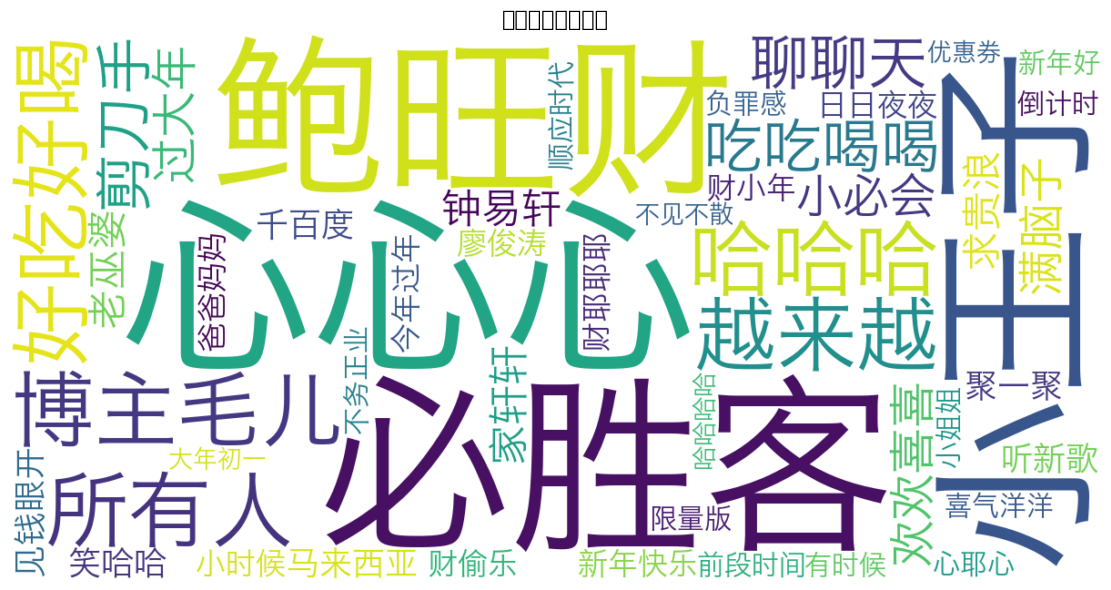

词云已保存到: 必胜客微博词云.png

前20个高频词:
 1. 必胜客        - 127481次 - 中性
 2. 心心心        - 100054次 - 中性
 3. 鲍旺财        - 50584次 - 中性
 4. 小王子        - 15124次 - 中性
 5. 博主毛儿       - 7128次 - 中性
 6. 哈哈哈        - 5881次 - 中性
 7. 所有人        - 5017次 - 中性
 8. 好吃好喝       - 4241次 - 积极
 9. 越来越        - 3655次 - 中性
10. 吃吃喝喝       - 3128次 - 中性
11. 聊聊天        - 2599次 - 中性
12. 剪刀手        - 2154次 - 中性
13. 小必会        - 2006次 - 中性
14. 过大年        - 1753次 - 中性
15. 满脑子        - 1691次 - 中性
16. 欢欢喜喜       - 1626次 - 中性
17. 钟易轩        - 1509次 - 中性
18. 求贵浪        - 1422次 - 中性
19. 家轩轩        - 1347次 - 中性
20. 老巫婆        - 1277次 - 中性


In [3]:
import pandas as pd
import jieba
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 定义情感词典
POSITIVE_WORDS = {
    '好', '棒', '优秀', '成功', '开心', '高兴', '快乐', '兴奋', '激动', '满意',
    '喜欢', '爱', '美好', '完美', '赞', '牛', '厉害', '不错', '太好了', '给力',
    '优', '佳', '妙', '精彩', '惊喜', '感动', '温暖', '舒服', '满足', '幸福'
}

NEGATIVE_WORDS = {
    '坏', '差', '糟糕', '失败', '难过', '伤心', '痛苦', '失望', '沮丧', '郁闷',
    '讨厌', '恨', '烦', '累', '疲惫', '焦虑', '担心', '害怕', '恐惧', '愤怒',
    '生气', '不满', '抱怨', '批评', '问题', '错误', '麻烦', '困难', '压力', '紧张'
}

# 停用词列表（需要你补充完整）
stopwords = {'的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '个', '上', '也', '很', '到', '说', '要', '去', '你', '会', '着', '没有', '看', '好', '自己', '这'}

def simple_sentiment_analysis(text):
    """基于词典的简化情感分析"""
    if not text:
        return 0.0
    
    # 检查包含关系
    positive_count = 0
    negative_count = 0
    
    # 检查完整词汇匹配
    for word in POSITIVE_WORDS:
        if word in text:
            positive_count += text.count(word)
    
    for word in NEGATIVE_WORDS:
        if word in text:
            negative_count += text.count(word)
    
    if positive_count == 0 and negative_count == 0:
        return 0.0
    
    # 计算情感得分
    total_sentiment_words = positive_count + negative_count
    if total_sentiment_words == 0:
        return 0.0
    
    sentiment_score = (positive_count - negative_count) / total_sentiment_words
    return max(-1, min(1, sentiment_score))

def get_sentiment_category(score):
    """根据情感得分返回分类"""
    if score > 0.1:
        return '积极'
    elif score < -0.1:
        return '消极'
    else:
        return '中性'

def clean_text(text):
    """文本清洗函数"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\u4e00-\u9fa5\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def create_wordcloud(text_data, output_path="wordcloud.png"):
    """创建词云"""
    try:
        # 生成词云
        wordcloud_params = {
            'width': 1200, 
            'height': 600, 
            'background_color': 'white',
            'max_words': 100,
            'collocations': False,
            'colormap': 'viridis',
            'relative_scaling': 0.5,
            'min_font_size': 10
        }
        
        # 尝试找到中文字体
        font_path = None
        possible_fonts = [
            '/System/Library/Fonts/PingFang.ttc',
            '/System/Library/Fonts/Hiragino Sans GB.ttc',
            'C:/Windows/Fonts/simhei.ttf',
            'C:/Windows/Fonts/msyh.ttc'
        ]
        
        for font_file in possible_fonts:
            if os.path.exists(font_file):
                font_path = font_file
                break
        
        if font_path:
            wordcloud_params['font_path'] = font_path
        
        wordcloud = WordCloud(**wordcloud_params).generate(text_data)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('微博文本词云分析', fontsize=16)
        plt.tight_layout()
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"词云已保存到: {output_path}")
        
    except Exception as e:
        print(f"词云生成失败: {e}")

def main():
    """主函数"""
    try:
        # 读取数据
        file_path = "/Users/liuyixuan/Desktop/作品集/必胜客/必胜客Campaign分析.xlsx"
        df = pd.read_excel(file_path, sheet_name="Weibo")
        
        print(f"原始数据条数: {len(df)}")
        
        # 文本清洗
        print("正在进行文本清洗...")
        df['清洗后内容'] = df["内容"].apply(clean_text)
        df = df[df['清洗后内容'].str.len() > 0]
        print(f"清洗后保留 {len(df)} 条有效数据")
        
        # 分词操作
        print("正在进行分词...")
        text_column = df["清洗后内容"]
        s = " ".join(text_column.astype(str))
        lst = jieba.lcut(s)
        
        # 创建词语DataFrame并过滤
        result_df = pd.DataFrame(lst, columns=["词语"])
        result_df = result_df[(result_df["词语"].str.len() > 2) & (~result_df['词语'].isin(stopwords))]
        
        # 统计词频
        word_freq = result_df['词语'].value_counts().reset_index()
        word_freq.columns = ['词语', '频率']
        
        # 使用词典方法进行情感分析
        print("正在进行情感分析...")
        word_freq['情感得分'] = word_freq['词语'].apply(simple_sentiment_analysis)
        word_freq['情感分析'] = word_freq['情感得分'].apply(get_sentiment_category)
        
        # 保存结果
        output_file = "weibo_textclean.xlsx"
        word_freq.to_excel(output_file, index=False, sheet_name='词频分析')
        print(f"结果已保存到: {output_file}")
        
        # 显示统计结果
        sentiment_counts = word_freq['情感分析'].value_counts()
        print("\n情感分析统计:")
        for sentiment, count in sentiment_counts.items():
            print(f"{sentiment}: {count} 个词语")
        
        # 生成词云
        print("\n生成词云...")
        wordcloud_text = ' '.join(word_freq['词语'].head(50))  # 使用前50个高频词
        create_wordcloud(wordcloud_text, "必胜客微博词云.png")
        
        # 显示前20个高频词
        print("\n前20个高频词:")
        for i, row in word_freq.head(20).iterrows():
            print(f"{i+1:2d}. {row['词语']:10s} - {row['频率']:3d}次 - {row['情感分析']}")
            
    except Exception as e:
        print(f"程序执行出错: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()